In [1]:
import sys
import os
# TEMPORARY FIX for KMP_DUPLICATE_LIB_OK error
os.environ['KMP_DUPLICATE_LIB_OK']='True'
current_dir = os.getcwd()
ROOT = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(ROOT)

from modules.solver.origami import RigidFoldableStructure
from modules.solver.kinematics import Kinematics
from modules.solver.util import pattern_visualizer, load_rfs_artifact_npz

In [2]:
miura_unit_info = load_rfs_artifact_npz("../data/import/Miura_Ori/miura_unit_cell.npz")
miura_unit_pattern = RigidFoldableStructure(
    vert=miura_unit_info["V"], edge=miura_unit_info["E"], face=miura_unit_info["F"], connection = miura_unit_info["C"])

[*] Loaded artifact <- ../data/import/Miura_Ori/miura_unit_cell.npz
[*] Sheet Signs Generated: [1]


(<Figure size 1000x800 with 1 Axes>,
 <Axes3D: title={'center': 'RFS Pattern Visualization'}, xlabel='X', ylabel='Y', zlabel='Z'>)

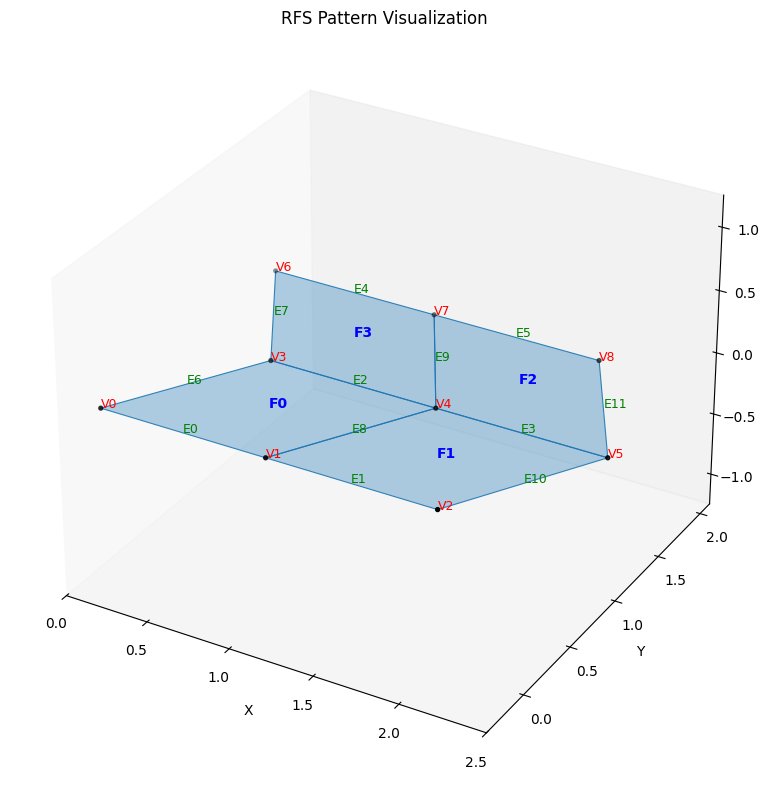

In [3]:
pattern_visualizer(miura_unit_pattern, show_vertices = True, show_edges = True, show_faces = True)

In [4]:
kinematics = Kinematics(miura_unit_pattern, k_raw = miura_unit_info["k_stiffness_raw"], 
                        theta_init_raw = miura_unit_info["theta_init_raw"], 
                        theta_equil_raw = miura_unit_info["theta_neutral_raw"], 
                        face_colors = miura_unit_info["face_colors"], reference_frame= miura_unit_info["reference_frame"])


angle_history_raw = kinematics._find_equilibrium_trajectory()

Processed iteration 200/5000, c = 1.745e-02, max_diff(deg) = 19.95, dof = 11
Converged: Max difference to target equilibrium (5.05e-06) is less than tolerance max_diff_threshold (1.00e-05).

Converged to equilibrium angles.


Processing 233 iterations and interpolating to 200 frames.
Exporting results... | fps: 30, play_speed: 1.0


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyvista\jupyter\notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


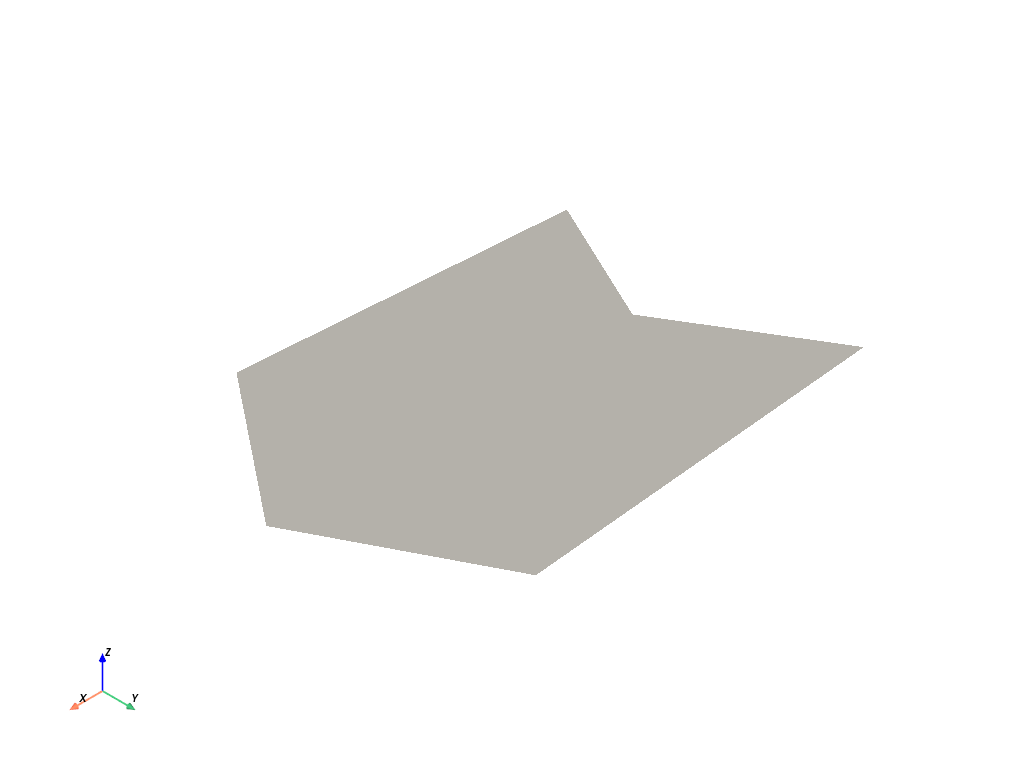

Done.


In [5]:
ply_path = '../data/visualization_result/Miura_Ori/miura_unit_cell.vtp'
npy_path = '../data/visualization_result/Miura_Ori/miura_unit_cell.npy'
gif_path = None # '../data/visualization_result/Miura_Ori/miura_unit_cell.gif'
vtk_path = None # '../data/visualization_result/Miura_Ori/unit_cell_vtk'

kinematics.export_trajectory(ply_path=ply_path, npy_path=npy_path, gif_path=gif_path, vtk_path = vtk_path, show_base=True)